In [1]:
import os
print(os.getcwd())

/Users/user/Desktop


In [2]:
# os.chdir(r'C:/Users/user/Desktop/Hevrin Data') # r is a raw string, not read as an escape sequence
print(os.getcwd())

/Users/user/Desktop


# I. DATA WRANGLING TO OBTAIN A TIME SERIES WITH A DATETIME INDEX

In [3]:
import pandas as pd
df= pd.read_csv('Hevrin Usage.csv',header= None,skiprows= 17, usecols= [*range(45,70)]) 
# skip rows st start August 1st
# nrows= 730,   nrows st two years to start with: better is all days, then resample to weekly with .resample('W')
print(df.shape)
df.head()

(2788, 25)


,45,46,47,48,49,50,51,52,53,54,...,60,61,62,63,64,65,66,67,68,69
0,08/01/2011,0.77,0.64,0.70,0.58,0.58,0.51,0.70,0.70,0.32,...,1.600,2.18,2.50,2.75,3.58,3.33,3.33,3.33,2.62,1.60
1,08/02/2011,0.77,0.64,0.70,0.70,0.58,0.64,0.70,0.38,0.26,...,2.112,1.66,2.43,3.07,4.29,8.45,6.08,3.71,2.75,1.86
2,08/03/2011,1.22,0.70,0.77,0.70,1.09,0.77,0.83,0.38,0.32,...,1.536,2.43,3.20,3.26,2.69,3.97,3.26,3.46,1.47,0.45
3,08/04/2011,0.38,0.58,0.38,0.38,0.38,0.32,0.45,0.38,0.32,...,0.704,2.05,3.39,3.65,3.33,2.56,1.47,1.09,1.22,0.77
4,08/05/2011,0.51,0.70,0.45,0.38,0.51,0.38,0.51,0.32,0.32,...,1.088,1.86,2.75,3.20,2.50,1.92,1.54,1.22,1.22,0.77


In [4]:
# df.info()

In [5]:
df.columns= ['day','00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [6]:
df= df.set_index(df['day'])
df= df.drop(['day'], axis=1)
df.tail(3)

,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
03/17/2019,0.58,0.45,0.58,0.58,0.45,0.51,0.51,0.51,0.96,2.11,...,1.024,0.96,0.96,1.22,2.18,6.78,2.75,2.88,0.83,0.51
03/18/2019,0.45,0.51,0.51,0.51,0.51,0.51,0.58,3.97,3.33,0.70,...,4.352,6.78,2.56,0.96,0.45,0.77,0.90,0.83,2.82,0.58
03/19/2019,0.58,0.51,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dft= df.stack()
dft=dft.reset_index()
dft.columns= ['day','hour','kwh'] # where 'day' is string, not DT

In [8]:
dft.head(8)

,day,hour,kwh
0,08/01/2011,00,0.77
1,08/01/2011,01,0.64
2,08/01/2011,02,0.70
3,08/01/2011,03,0.58
4,08/01/2011,04,0.58
5,08/01/2011,05,0.51
6,08/01/2011,06,0.70
7,08/01/2011,07,0.70


In [9]:
dft['date']= pd.to_datetime(dft['day'] + ' ' + dft['hour'] + ':00:00')
from datetime import datetime
dft['weekday']= dft.date.dt.weekday_name
dft['month']= dft.date.dt.month
dft['year']= dft.date.dt.year
dft.set_index(dft['date'], inplace= True)
dft= dft.drop(['day','date'], axis=1)
dft['hour']= dft['hour'].astype('category')
dft['weekday']= dft['weekday'].astype('category')
dft['month']= dft['month'].astype('category')
dft['year']= dft['year'].astype('category')
dft.info()
dft.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66505 entries, 2011-08-01 00:00:00 to 2019-03-19 02:00:00
Data columns (total 5 columns):
hour       66505 non-null category
kwh        66505 non-null float64
weekday    66505 non-null category
month      66505 non-null category
year       66505 non-null category
dtypes: category(4), float64(1)
memory usage: 1.3 MB


,hour,kwh,weekday,month,year
date,,,,,
2011-08-01 00:00:00,00,0.77,Monday,8,2011
2011-08-01 01:00:00,01,0.64,Monday,8,2011
2011-08-01 02:00:00,02,0.70,Monday,8,2011
2011-08-01 03:00:00,03,0.58,Monday,8,2011
2011-08-01 04:00:00,04,0.58,Monday,8,2011


# II. EXPLORATORY DATA ANALYSIS

In [10]:
import matplotlib.pyplot as plt
weekly= dft.kwh.resample('W').sum()
monthly= 0.25 * dft.kwh.resample('M').sum()
plt.plot(weekly)
plt.plot(monthly)
plt.title('Weekly & Monthly Household Power Consumption in kwh')
plt.ylabel('kwh')
plt.show()        #

<Figure size 640x480 with 1 Axes>

What is surprising about the above time series is that despite the family's addition of two energy-intensive children (including due to more laundry and cooking), and a small EV in 2018, replaced by a large EV in 2019, the highest weekly peaks occured not in the last year, but rather in 2012 and 2013. 
This could be weather related as hot summers and cold winters can materially increase the load.
Also the hourly peaks are most relevant, not the weekly totals and this matter needs to be investigated quite separately.

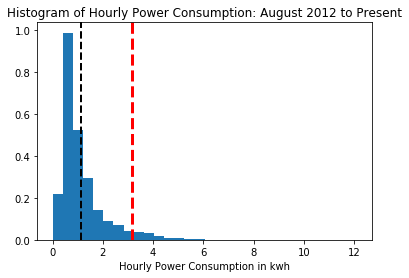

In [11]:
plt.hist(dft.kwh, bins=30, density= True)
plt.title('Histogram of Hourly Power Consumption: August 2012 to Present')
plt.xlabel('Hourly Power Consumption in kwh')
plt.axvline(dft.kwh.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(3.15, color='r', linestyle='dashed', linewidth=3)
plt.show()

# An Unusual Perspective
We are not particulary concerned about the entire distribution. Of especial interest in our context is when the local distribution transformer is overloaded, and therefore its remaining life is shortened due to overheating. Suppose the capacity of the transformer is the standard 25 kva. Overheating seems to start at around 64% of the capacity, which is 15.75 kva. If we divide that by the assumed five households (but sometimes even seven?), then the threshold is 3.15 kva, as marked by the vertical red line above, and the horizontal red lines below. 

It seems that historically it has been relatively rare that this threshold has been exceeded. As an illustration of the adverse consequences of overloading, when the Load Factor is 0.75, then the Remaining Life of the transformer declines to less than four years. One intuitive interpretation is that each hour at this load factor is equivalent (in terms of reducing the remaining life) to more than five hours below the 64% threshold level.

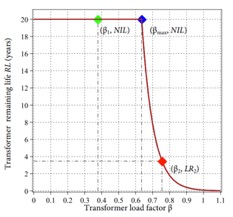

# Transformer Ageing is Highly Non-Linear 

At 0.64 Load Factor (and below), each hour is equivalent to 1.0 hours (corresponding to a 20-year remaining life).

At 0.70 Load Factor, each hour is now equivalent to 2.65 hours.

At 0.75 Load Factor, each hour is now equivalent to 5.65 hours.

At 0.80 Load factor, each hour is now equivalent to 11.67 hours.

At 0.85 Load factor, each hour is now equivalent to 23.3 hours.

At 0.90 Load factor, each hour is now equivalent to 38.9 hours.

At 0.95 Load factor, each hour is now equivalent to 70.0 hours.

NB The above exponentially increasing factors are not inconsistent with the statement that "transformer overloading can shorten the life by as much as 10,000-times".

In [12]:
# A Python Dictionary of a selection of Load Factors and the respective number of age-equivalent years is provided here:
age_acceleration_factors= {0.64:1, 0.70:2.65, 0.75:5.65, 0.80:11.67, 0.85:23.3, 0.90:38.9, 0.95:70.0}

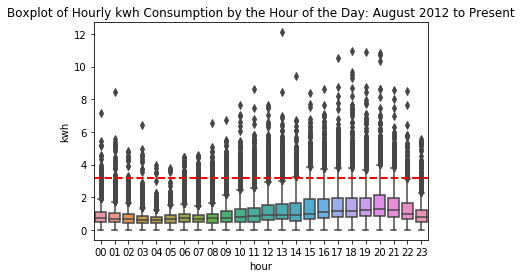

In [13]:
import seaborn as sns
sns.boxplot(x= dft.hour,y=dft.kwh)
plt.axhline(3.15, color='r', linestyle='dashed', linewidth=2)
plt.title('Boxplot of Hourly kwh Consumption by the Hour of the Day: August 2012 to Present')
plt.show()

In [14]:
# seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, 
#                palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)¶

Text(0.5, 1.0, 'Boxplot of Hourly Power Consumption by Month')

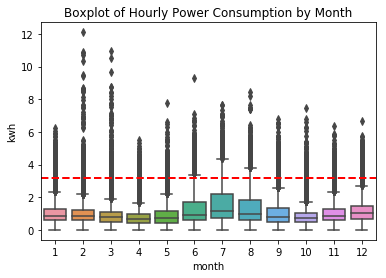

In [15]:
sns.boxplot(dft.month, dft.kwh)
plt.axhline(3.15, color='r', linestyle='dashed', linewidth=2)
plt.title('Boxplot of Hourly Power Consumption by Month')

Text(0.5, 1.0, 'Boxplot of Hourly Power Consumption by Year')

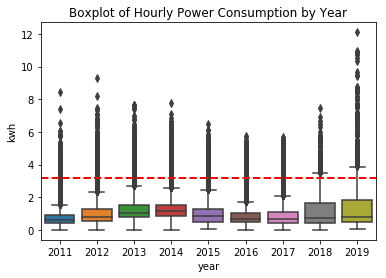

In [16]:
sns.boxplot(dft.year, dft.kwh)
plt.axhline(3.15, color='r', linestyle='dashed', linewidth=2)
plt.title('Boxplot of Hourly Power Consumption by Year')
# The median consumption in the years 2012 & 2013 is NOT higher than 2014, so perhaps the high weekly 
# consumption level peaks in those years (see above) was due to weather conditions (eg a hot summer and a high A/C load).

# But in fact the years 2018 & 2019 are different
In these two years the upper quartile exceeds the 3.15 threshold, so it appears that a quarter of the time the threshold level for accelerating the ageing of the transformer is exceeded. However, this is only on an AVERAGE basis, and so is unduly conservative as the other [four] households served likely still have lower power consumption, as they have not yet acquired EV's.

In [17]:
df_12= dft[dft.year== 2012]
df_12.head(3)

,hour,kwh,weekday,month,year
date,,,,,
2012-01-01 00:00:00,00,3.07,Sunday,1,2012
2012-01-01 01:00:00,01,1.02,Sunday,1,2012
2012-01-01 02:00:00,02,0.45,Sunday,1,2012


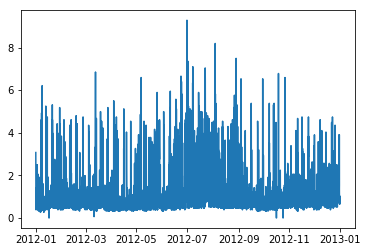

In [18]:
plt.plot(df_12.kwh)
plt.show()

(array([3.26578619e-01, 1.02631953e+00, 3.23620926e-01, 1.37039783e-01,
        9.61250276e-02, 6.63016216e-02, 5.12666814e-02, 4.68301417e-02,
        3.10557781e-02, 1.97179544e-02, 1.28166703e-02, 7.14775846e-03,
        4.43653974e-03, 1.97179544e-03, 1.97179544e-03, 1.23237215e-03,
        2.46474430e-04, 2.46474430e-04, 0.00000000e+00, 2.46474430e-04]),
 array([0.   , 0.464, 0.928, 1.392, 1.856, 2.32 , 2.784, 3.248, 3.712,
        4.176, 4.64 , 5.104, 5.568, 6.032, 6.496, 6.96 , 7.424, 7.888,
        8.352, 8.816, 9.28 ]),
 <a list of 20 Patch objects>)

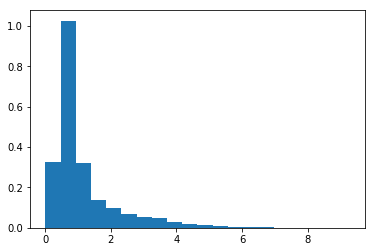

In [19]:
plt.hist(df_12.kwh, bins=20, density= True)

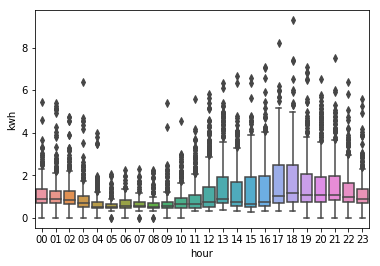

In [20]:
sns.boxplot(x= df_12.hour,y=df_12.kwh)

In [21]:
monthly= df_12.kwh.resample('W').sum()

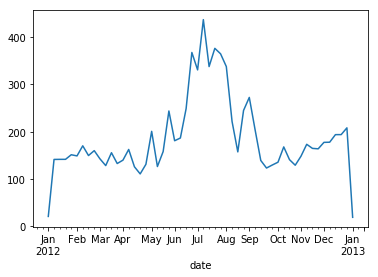

In [22]:
monthly.plot()

# A Small EV and a Level 1 "Trickle Charger" were Acquired in July, 2018¶
After July we see relatively little "white space" below the red horizontal line, suggesting that the trickle charger was active throughout much of the night.

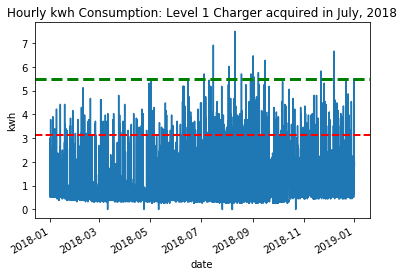

In [23]:
df_18= dft[dft.year== 2018]
df_18.kwh.plot()
plt.axhline(3.15, color='r', linestyle='dashed', linewidth=2)
plt.axhline(5.5, color='g', linestyle='dashed', linewidth=3)
plt.title("Hourly kwh Consumption: Level 1 Charger acquired in July, 2018")
plt.ylabel("kwh")
# plt.axvline(2018-07-01 00:00:00, color='y', linestyle='dashed', linewidth=5)# problem w datetime specification
plt.show()

In [24]:
df_18.info() # hour and month are each strings (and categorical variables)
df_18.tail(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8744 entries, 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 5 columns):
hour       8744 non-null category
kwh        8744 non-null float64
weekday    8744 non-null category
month      8744 non-null category
year       8744 non-null category
dtypes: category(4), float64(1)
memory usage: 172.8 KB


,hour,kwh,weekday,month,year
date,,,,,
2018-12-31 21:00:00,21,2.05,Monday,12,2018
2018-12-31 22:00:00,22,1.98,Monday,12,2018
2018-12-31 23:00:00,23,1.86,Monday,12,2018


In [25]:
df_18['kwhMA8C']= df_18.kwh.rolling(8,center= True).mean()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


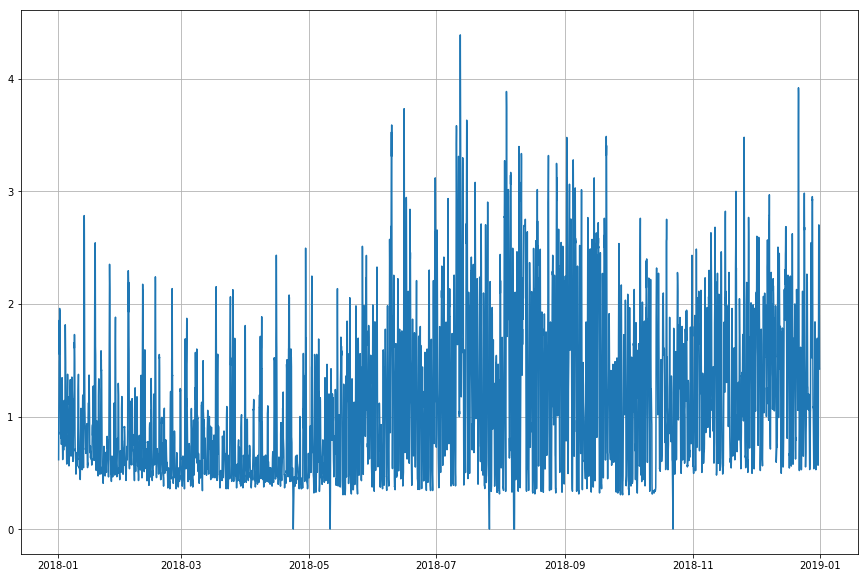

In [26]:
plt.figure(figsize= (15,10))
plt.grid(True)
# plt.plot(df_18.kwh, label= 'kwh')
plt.plot(df_18.kwhMA8C, label= 'Centered 8-hour Moving Average')

In [27]:
sum(df_18.kwh > 3.15) # so for the whole year 2018, of 8,760 hours just 466 exceeded the hourly threshold of 3.15 kwh

466

In [28]:
# df_18.month.isin() # weird 'year' and month behave here like non-strings!!

In [29]:
pre_L1= df_18[df_18.month.isin([1,2,3,4,5,6])]
post_L1= df_18[df_18.month.isin([7,8,9,10,11,12])]
pre_L1.head()

,hour,kwh,weekday,month,year,kwhMA8C
date,,,,,,
2018-01-01 00:00:00,00,0.58,Monday,1,2018,NaN
2018-01-01 01:00:00,01,0.77,Monday,1,2018,NaN
2018-01-01 02:00:00,02,0.70,Monday,1,2018,NaN
2018-01-01 03:00:00,03,0.70,Monday,1,2018,NaN
2018-01-01 04:00:00,04,0.58,Monday,1,2018,0.61625


# One possible Signal for Classifying the new use of a Level 1 Charger is the number of times a certain hourly kwh threshold is exceeded
For example, in the first half of 2018 not once was an hourly consumption of more than 5.5 kwh recorded.
However, after the Level 1 charger was acquired in July, this threshold was exceeded 13 times.

In [30]:
print(sum(pre_L1.kwh > 5.5))

0


In [31]:
print(sum(post_L1.kwh > 5.5))

13


# Another possible Signal for Classifying the new use of a Level 1 Charger is derived from total monthly power consumption

The following analysis of (resampled) monthly data explores a potential Level 1 Charger Signal.
One idea is that with the acquisition of a Level 1 charger the monthly total kwh consumption should increase.

For example, charging for 1,000 miles driven each month would add about 333 kwh per month (since 1 kwh fuels c.3 miles).

A monthly_baseline is established, which is the average of the preceding four years (so 2014-2017 here).

This is of course just one "signal" or feature. It is desireable to posit a number of such features, and then to test which combination of them is most efffective in accurately classifying a large sample of EV's.

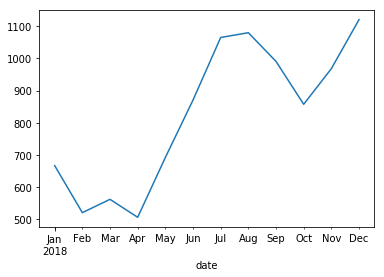

In [32]:
df_18.kwh.resample('M').sum().plot()

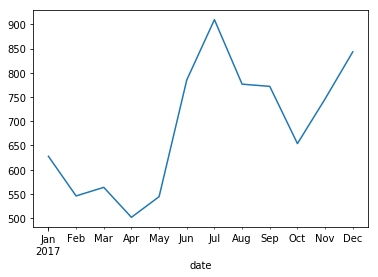

In [33]:
df_17= dft[dft.year== 2017]
df_17.kwh.resample('M').sum().plot()

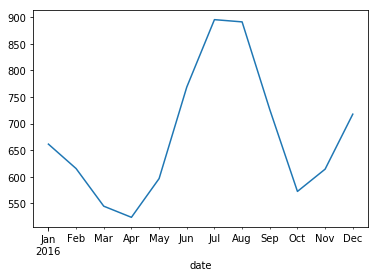

In [34]:
df_16= dft[dft.year== 2016]
df_16.kwh.resample('M').sum().plot()

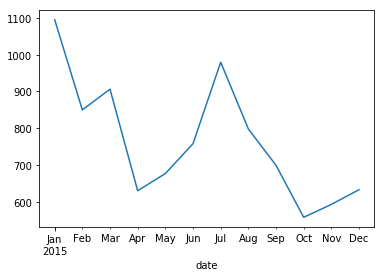

In [35]:
df_15= dft[dft.year== 2015]
df_15.kwh.resample('M').sum().plot()

In [36]:
df_15.kwh.resample('M').sum().values

array([1094.996,  849.836,  906.172,  630.418,  677.104,  758.152,
        979.404,  798.142,  699.396,  558.212,  593.326,  633.222])

[ 980.066  906.604  903.344  846.608 1009.83  1223.656 1058.362 1125.796
  909.968  891.098 1025.124 1175.874]


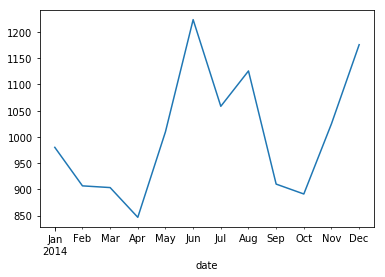

In [37]:
df_14= dft[dft.year== 2014]
print(df_14.kwh.resample('M').sum().values)
df_14.kwh.resample('M').sum().plot()

In [38]:
monthly_baseline= 0.25 * (df_14.kwh.resample('M').sum().values + df_15.kwh.resample('M').sum().values + 
                   df_16.kwh.resample('M').sum().values + df_17.kwh.resample('M').sum().values)

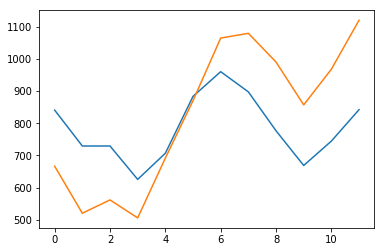

In [39]:
plt.plot(monthly_baseline)
plt.plot(df_18.kwh.resample('M').sum().values)

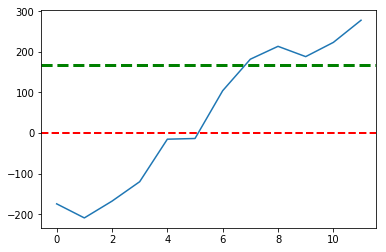

In [40]:
plt.axhline(0, color='r', linestyle='dashed', linewidth=2) # zero reference
plt.axhline(167, color='g', linestyle='dashed', linewidth=3)# 500 miles/month minimum is an extra 167 kwh/month
plt.plot(df_18.kwh.resample('M').sum().values - monthly_baseline)

# Repeating the above analysis but just for the 12 hours when the EV is likely to be at the residence (hours 0-5, 18-23 ): this yields a sharper contrast.

In [41]:
dft.head()
# dft.hour.isin(['00','01','02','03','04','05','18','19','20','21','22','23']) #12 hours = half day, abbreviation H


,hour,kwh,weekday,month,year
date,,,,,
2011-08-01 00:00:00,00,0.77,Monday,8,2011
2011-08-01 01:00:00,01,0.64,Monday,8,2011
2011-08-01 02:00:00,02,0.70,Monday,8,2011
2011-08-01 03:00:00,03,0.58,Monday,8,2011
2011-08-01 04:00:00,04,0.58,Monday,8,2011


In [42]:
df_17H= dft[(dft.year== 2017) & (dft.hour.isin(['00','01','02','03','04','05','18','19','20','21','22','23']))]
df_17H.head(10)

,hour,kwh,weekday,month,year
date,,,,,
2017-01-01 00:00:00,00,0.51,Sunday,1,2017
2017-01-01 01:00:00,01,0.51,Sunday,1,2017
2017-01-01 02:00:00,02,0.45,Sunday,1,2017
2017-01-01 03:00:00,03,0.51,Sunday,1,2017
2017-01-01 04:00:00,04,0.45,Sunday,1,2017
2017-01-01 05:00:00,05,0.58,Sunday,1,2017
2017-01-01 18:00:00,18,0.70,Sunday,1,2017
2017-01-01 19:00:00,19,0.90,Sunday,1,2017
2017-01-01 20:00:00,20,0.77,Sunday,1,2017


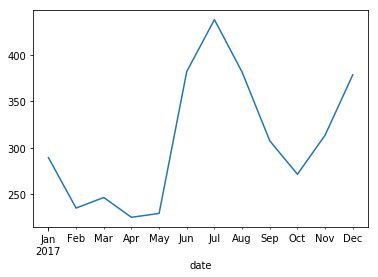

In [43]:
df_17H.kwh.resample('M').sum().plot()

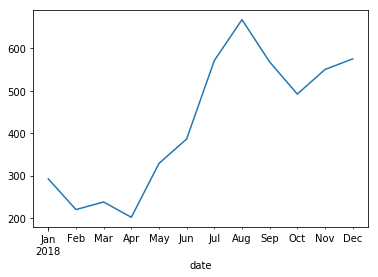

In [44]:
df_18H= dft[(dft.year== 2018) & (dft.hour.isin(['00','01','02','03','04','05','18','19','20','21','22','23']))]
df_18H.kwh.resample('M').sum().plot()

In [45]:
df_18H= dft[(dft.year== 2018) & (dft.hour.isin(['00','01','02','03','04','05','18','19','20','21','22','23']))]
df_17H= dft[(dft.year== 2017) & (dft.hour.isin(['00','01','02','03','04','05','18','19','20','21','22','23']))]
df_16H= dft[(dft.year== 2016) & (dft.hour.isin(['00','01','02','03','04','05','18','19','20','21','22','23']))]
df_15H= dft[(dft.year== 2015) & (dft.hour.isin(['00','01','02','03','04','05','18','19','20','21','22','23']))]
df_14H= dft[(dft.year== 2014) & (dft.hour.isin(['00','01','02','03','04','05','18','19','20','21','22','23']))]
monthly_baseline_H= 0.25 * (df_14H.kwh.resample('M').sum().values + df_15H.kwh.resample('M').sum().values + 
                   df_16H.kwh.resample('M').sum().values + df_17H.kwh.resample('M').sum().values)

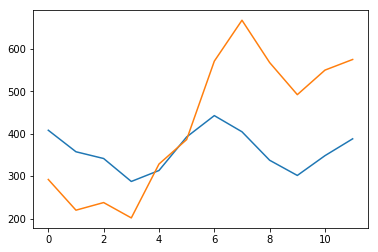

In [46]:
plt.plot(monthly_baseline_H)
plt.plot(df_18H.kwh.resample('M').sum().values)

plt.axhline(0, color='r', linestyle='dashed', linewidth=2) # zero reference
plt.axhline(167, color='g', linestyle='dashed', linewidth=3)# 500 miles/month minimum is an extra 167 kwh/month
plt.axvline(7, color='y', linestyle='dashed', linewidth=5)
plt.title('For the year 2018, Monthly Difference between Actual and the 4-Year baseline Consumption in kwh')
plt.xlabel('Month of the Year')
plt.ylabel('kwh')
plt.plot(df_18H.kwh.resample('M').sum().values - monthly_baseline_H)

# Successful Signal for Discerning the Acquisition of a Level 1 EV Charger
For the 12 hours (midnight to 6am, 6pm to midnight) that an EV is more likely to be at a residence,a monthly baseline is first established as the average of the preceding (trailing) 4 years, or 48 months.
This Baseline is then subtracted from the monthly values of the current year (for just the same 12 hours).
If the positive difference exceeds 167 kwh for three consecutive months, then the Residence is classified as owning a Level 1 EV charger. The 167 kwh/month threshold is predicated on an assumed 500 miles driven per month, and that 1 kwh fuels 3 miles of driving.

This approach can easily be generalised to the current months versus a four-year moving average.

# A Third possible Signal for Classifying the new use of a Level 1 Charger might derived from sequences of seven hours at night, or minimum threshold levels
One characteristic of a Level 1 charger (aka a "Trickle Charger) is that it is typically charging for a number of consecutive hours. For example, to provide for a 50-mile round trip would require about 17kwh, and at a charging rate of 1.9 kwh, that would take about nine consecutive hours. This might occur from 6pm to 3am, or from 9pm to 6am, for example. An approach that incorporates a seven-hour moving average might provide an indication of whether Level 1 EV charging is occuring.

# A Fourth possible Signal for Classifying the new use of a Level 1 Charger might be derived from a TOU-driven mini-spike
Where the EV charger is the customer of an electric utility that offers the option of a so-called "Time-Of-Use" (TOU) electricity tariff, EV chargers are incentivized to delay their charging until the onset of a designated "Off-Peak" period, which might start as early as 8pm or as late as midnight, and generally extends to 6am: the electricity tariff for the Off-Peak period is usually at a much lower price - even less than half the price for the preceding Peak Period. Most charging devices have timers, and the customers whohave chosen to subscribe to the TOU option therefore often set their timer to the onset of the Off-Peak period. Experience has shown that this tends to create a mini-peak. Incidentally, sometimes this option is offered to all of a utility's customers, while in other cases it may be offered exclusively to EV chargers who have signed up.

Since Corn Belt Energy does not currently offer a TOU Plan, this approach is not immediately relevant.

# An Ensemble Approach to Classification is often Superior

Four alternative signals have been outlined above that might be helpful in discerning whether a given household is an EV charger.

A statistical analysis can be performed to see which of the four Signals is superior. However,since the approaches are quite different, they may not be fully-correlated with one another. Accordingly, a mixture (ensemble approach) has often been found to be optimal.

This can be achieved in many ways, including by assigning appropriate weights to each of the different approaches.

Another way is to have a voting procedure. Suppose for example that three of the Signals are used, then each Classifier is assigned one vote, and the maority vote prevails.

# Risk Management Approach

There appears to be a significant assymettry in the cost of different outcomes (in formal terms, in the respective costs of Type I and Type II Classification errors). 

For example, suppose a household is initially classified by some judicious combination of the above-outlined Signals as having an EV charger, then the next steps may be:

(a) investigative (additional information gathering, for example), or 

(b) Promotional (making a highly attractive offer of some kind, for example to subscribe to a TOU plan, or to so-called Managed Charging).

Both of these steps are likely to be relatively inexpensive, and may represent wise precautionary investments with large associated benefits.

In contrast, consider the quite different cost of having missed one or more EV chargers served by the same local distribution transformer. Suppose that the transformer is repeatedly loaded during Peak Periods to 90% or more of its capacity, and its life is materially shortened as a result.Eventually a brown-out occurs, with two non-trivial costs. First, the transformer must be replaced, at a cost of the order of $7,500. Second, there may be repuational damage incurred, as all 5-7 households served by that transformer would have suffered from the consequences of the brown-out. Moreover, as such brown-out's become increasingly common in line with projected EV adoption levels, there could be delays in obtaining new transformers, and even in installing them, as qualified work crews become overburdened with such jobs. These costs could easily be one-hundred to one-thousand times higher.

Accordingly, it may be prudent to err on the side of caution and notionally classify a household as an EV charger even if the probability assigned by a chosen algorithm is less than 0.5. 

It would probably be sensible to accord quite different follow-up courses of action depending on whether the assigned probability was 0.3, 0.5, or 0.9. as the saying goes, "The devil is in the details".

# pane
df_18H.kwh.resample('M').sum().plot()
df_18H.kwh.resample('M').sum().plot()
df_18H.kwh.resample('M').sum().plot()
df_18H.kwh.resample('M').sum().plot()
df_18H.kwh.resample('M').sum().plot()

# A Small EV and a Level 1 "Trickle Charger" were Acquired in July, 2018
After July we see relatively little "white space" below the red horizontal line, suggesting that the trickle charger was active throughout much of the night.

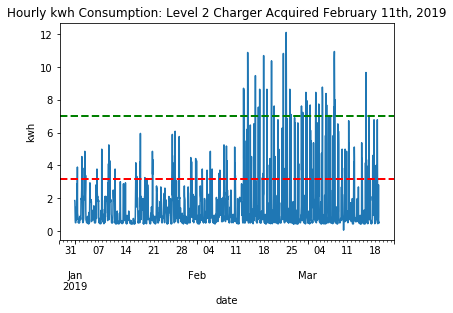

In [47]:
df_19= dft[dft.year== 2019]
df_19.kwh.plot()
plt.title('Hourly kwh Consumption: Level 2 Charger Acquired February 11th, 2019')
plt.ylabel('kwh')
plt.axhline(3.15, color='r', linestyle='dashed', linewidth=2)
plt.axhline(7, color='g', linestyle='dashed', linewidth=2)
plt.show()

# A Large (Tesla) EV and a Level 2 "Fast Charger" were Acquired in February, 2019
In mid-February and beyond we see 7 kwh of consumption frequently, while before even with the EV with the smaller battery it had been comparatively rare.

In [48]:
sum(df_19.kwh > 7) # this includes just one month and several days of EV ownership

41

In [49]:
sum(df_18.kwh > 7)  # for the year, just a single occurrence

1

In [50]:
sum(df_17.kwh > 7)  # for the year,not a single occurrence

0

In [51]:
sum(df_16.kwh > 7)  # for the year, not a single occurrence

0

# Establishing a Baseline for Power Consumption using OLS Regression
The approach is to use 2017 as a baseline year for purposes of comparison. The year 2018 is unsuitable as the numbers were materially higher in the second half of the year due to the small EV acquisition.

In [52]:
k_19 = dft['2019-02-12':'2019-03-18']

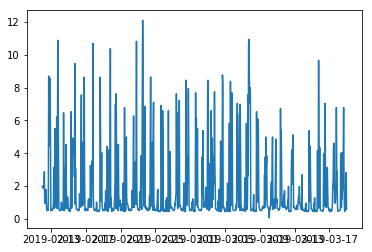

In [53]:
plt.plot(k_19.kwh) 

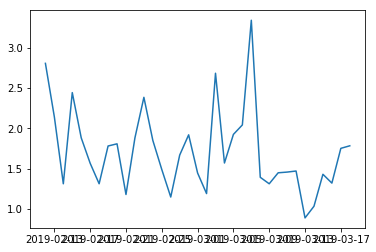

In [54]:
plt.plot(k_19.kwh.resample('D').mean())

In [55]:
k_19 = dft['2019-02-12':'2019-03-18'].kwh.reset_index()

In [56]:
k_18 = dft['2018-02-12':'2018-03-18'].kwh.reset_index()
k_18[0:10]

,date,kwh
0,2018-02-12 00:00:00,0.45
1,2018-02-12 01:00:00,0.58
2,2018-02-12 02:00:00,0.51
3,2018-02-12 03:00:00,0.51
4,2018-02-12 04:00:00,0.58
5,2018-02-12 05:00:00,1.02
6,2018-02-12 06:00:00,0.70
7,2018-02-12 07:00:00,0.83
8,2018-02-12 08:00:00,0.96
9,2018-02-12 09:00:00,0.38


In [57]:
k_17 = dft['2017-02-12':'2017-03-18'].kwh.reset_index()


In [58]:
k_16 = dft['2016-02-12':'2016-03-18'].kwh.reset_index()

In [59]:
two_years= pd.merge(k_16, k_17, left_index= True, right_index= True)

In [60]:
two_years.head()
two_years.columns= ['date_16','kwh_16','date_17','kwh_17']
two_years.head()

,date_16,kwh_16,date_17,kwh_17
0,2016-02-12 00:00:00,0.58,2017-02-12 00:00:00,0.64
1,2016-02-12 01:00:00,0.51,2017-02-12 01:00:00,0.51
2,2016-02-12 02:00:00,0.51,2017-02-12 02:00:00,0.45
3,2016-02-12 03:00:00,0.51,2017-02-12 03:00:00,0.45
4,2016-02-12 04:00:00,0.58,2017-02-12 04:00:00,0.58


In [61]:
three_years= pd.merge(two_years,k_18, left_index= True, right_index= True)

In [62]:
three_years.head()
three_years.rename(columns= {'kwh_18':'kwh'})
three_years.head()

,date_16,kwh_16,date_17,kwh_17,date,kwh
0,2016-02-12 00:00:00,0.58,2017-02-12 00:00:00,0.64,2018-02-12 00:00:00,0.45
1,2016-02-12 01:00:00,0.51,2017-02-12 01:00:00,0.51,2018-02-12 01:00:00,0.58
2,2016-02-12 02:00:00,0.51,2017-02-12 02:00:00,0.45,2018-02-12 02:00:00,0.51
3,2016-02-12 03:00:00,0.51,2017-02-12 03:00:00,0.45,2018-02-12 03:00:00,0.51
4,2016-02-12 04:00:00,0.58,2017-02-12 04:00:00,0.58,2018-02-12 04:00:00,0.58


In [63]:
four_years= pd.merge(three_years,k_19, left_index= True, right_index= True)
four_years.head()

,date_16,kwh_16,date_17,kwh_17,date_x,kwh_x,date_y,kwh_y
0,2016-02-12 00:00:00,0.58,2017-02-12 00:00:00,0.64,2018-02-12 00:00:00,0.45,2019-02-12 00:00:00,1.98
1,2016-02-12 01:00:00,0.51,2017-02-12 01:00:00,0.51,2018-02-12 01:00:00,0.58,2019-02-12 01:00:00,1.92
2,2016-02-12 02:00:00,0.51,2017-02-12 02:00:00,0.45,2018-02-12 02:00:00,0.51,2019-02-12 02:00:00,1.92
3,2016-02-12 03:00:00,0.51,2017-02-12 03:00:00,0.45,2018-02-12 03:00:00,0.51,2019-02-12 03:00:00,1.86
4,2016-02-12 04:00:00,0.58,2017-02-12 04:00:00,0.58,2018-02-12 04:00:00,0.58,2019-02-12 04:00:00,1.86


In [64]:
four_years.columns= ['date_16','kwh_16','date_17','kwh_17', 'date_18','kwh_18','date_19','kwh_19']
four_years.head()

,date_16,kwh_16,date_17,kwh_17,date_18,kwh_18,date_19,kwh_19
0,2016-02-12 00:00:00,0.58,2017-02-12 00:00:00,0.64,2018-02-12 00:00:00,0.45,2019-02-12 00:00:00,1.98
1,2016-02-12 01:00:00,0.51,2017-02-12 01:00:00,0.51,2018-02-12 01:00:00,0.58,2019-02-12 01:00:00,1.92
2,2016-02-12 02:00:00,0.51,2017-02-12 02:00:00,0.45,2018-02-12 02:00:00,0.51,2019-02-12 02:00:00,1.92
3,2016-02-12 03:00:00,0.51,2017-02-12 03:00:00,0.45,2018-02-12 03:00:00,0.51,2019-02-12 03:00:00,1.86
4,2016-02-12 04:00:00,0.58,2017-02-12 04:00:00,0.58,2018-02-12 04:00:00,0.58,2019-02-12 04:00:00,1.86


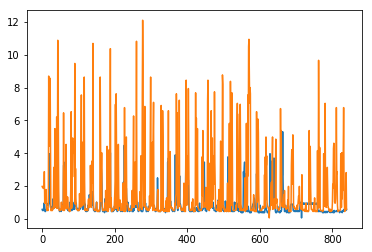

In [65]:
plt.plot(four_years.kwh_16)
plt.plot(four_years.kwh_19)


In [66]:
four_years['baseline']= (four_years.kwh_16 + four_years.kwh_17 + four_years.kwh_18)/3
four_years= four_years.drop(['date_16','date_17','date_18'], axis= 1)
four_years.head()

,kwh_16,kwh_17,kwh_18,date_19,kwh_19,baseline
0,0.58,0.64,0.45,2019-02-12 00:00:00,1.98,0.556667
1,0.51,0.51,0.58,2019-02-12 01:00:00,1.92,0.533333
2,0.51,0.45,0.51,2019-02-12 02:00:00,1.92,0.490000
3,0.51,0.45,0.51,2019-02-12 03:00:00,1.86,0.490000
4,0.58,0.58,0.58,2019-02-12 04:00:00,1.86,0.580000


In [67]:
four_years['increment']= (four_years.kwh_19 - four_years.baseline)
four_years.head()

,kwh_16,kwh_17,kwh_18,date_19,kwh_19,baseline,increment
0,0.58,0.64,0.45,2019-02-12 00:00:00,1.98,0.556667,1.423333
1,0.51,0.51,0.58,2019-02-12 01:00:00,1.92,0.533333,1.386667
2,0.51,0.45,0.51,2019-02-12 02:00:00,1.92,0.490000,1.430000
3,0.51,0.45,0.51,2019-02-12 03:00:00,1.86,0.490000,1.370000
4,0.58,0.58,0.58,2019-02-12 04:00:00,1.86,0.580000,1.280000


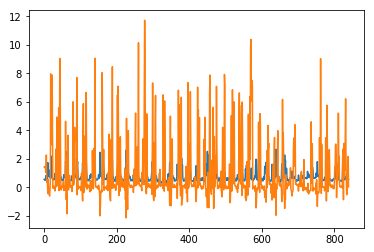

In [68]:
plt.plot(four_years.baseline)
plt.plot(four_years.increment)
plt.show()

In [69]:
four_years['hour']= four_years.date_19.dt.hour
four_years['weekday']= four_years.date_19.dt.weekday_name  # weekday to exlore if weekend charging during the day
# dft['weekday']= dft.date.dt.weekday_name
four_years.head(20)

,kwh_16,kwh_17,kwh_18,date_19,kwh_19,baseline,increment,hour,weekday
0,0.580,0.64,0.450,2019-02-12 00:00:00,1.980,0.556667,1.423333,0,Tuesday
1,0.510,0.51,0.580,2019-02-12 01:00:00,1.920,0.533333,1.386667,1,Tuesday
2,0.510,0.45,0.510,2019-02-12 02:00:00,1.920,0.490000,1.430000,2,Tuesday
3,0.510,0.45,0.510,2019-02-12 03:00:00,1.860,0.490000,1.370000,3,Tuesday
4,0.580,0.58,0.580,2019-02-12 04:00:00,1.860,0.580000,1.280000,4,Tuesday
5,0.960,0.45,1.020,2019-02-12 05:00:00,1.860,0.810000,1.050000,5,Tuesday
6,0.580,0.58,0.700,2019-02-12 06:00:00,2.880,0.620000,2.260000,6,Tuesday
7,0.510,0.45,0.830,2019-02-12 07:00:00,0.960,0.596667,0.363333,7,Tuesday
8,0.450,0.64,0.960,2019-02-12 08:00:00,1.020,0.683333,0.336667,8,Tuesday
9,0.450,0.90,0.380,2019-02-12 09:00:00,0.960,0.576667,0.383333,9,Tuesday


Text(0.5, 0, 'Difference in kwh')

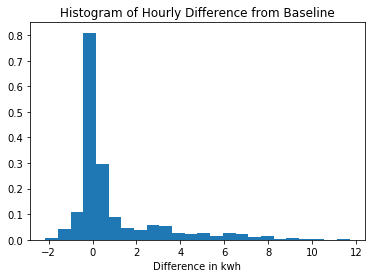

In [70]:
plt.hist(four_years.increment, bins=24, density= True)
plt.title('Histogram of Hourly Difference from Baseline')
plt.xlabel('Difference in kwh')
# NB Symmetric Distribution centered around zero is likely just random.
# We should therefore look at the most common hours for when the difference (aka 'increment') is more than 2.

In [71]:
big_difference= four_years[four_years.increment > 2]
big_difference.head()

,kwh_16,kwh_17,kwh_18,date_19,kwh_19,baseline,increment,hour,weekday
6,0.58,0.58,0.70,2019-02-12 06:00:00,2.88,0.620000,2.260000,6,Tuesday
18,1.02,0.58,0.64,2019-02-12 18:00:00,8.70,0.746667,7.953333,18,Tuesday
19,1.41,0.83,2.11,2019-02-12 19:00:00,4.42,1.450000,2.970000,19,Tuesday
20,3.97,1.92,0.64,2019-02-12 20:00:00,8.13,2.176667,5.953333,20,Tuesday
21,1.02,0.58,0.77,2019-02-12 21:00:00,8.58,0.790000,7.790000,21,Tuesday


Text(0.5, 0, 'Difference in kwh')

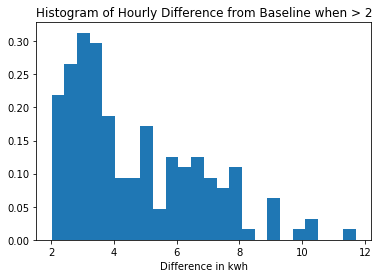

In [72]:
plt.hist(big_difference.increment, bins=24, density= True)
plt.title('Histogram of Hourly Difference from Baseline when > 2')
plt.xlabel('Difference in kwh')

In [73]:
gh= big_difference.groupby('hour')

hour
0     6.636667
1     7.873333
6     2.260000
7     2.264000
8     3.646000
9     4.857778
10    4.536500
11    4.118667
12    4.461250
13    4.830952
14    5.340667
15    4.454167
16    3.841250
17    4.559697
18    5.936667
19    4.696842
20    5.456275
21    4.540000
22    5.697778
23    4.283333
Name: increment, dtype: float64


<BarContainer object of 20 artists>

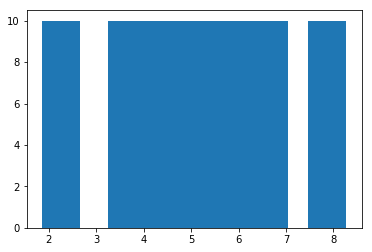

In [74]:
gh.mean()
print(gh.increment.mean())
# VERY INTERESTING THAT NO COUNTS FOR HOURS 2,3,4,5!!! CHARGING PRESUMABLY COMPLETED BY THEN??
# possibly bi-modal: hours 0 & 1 are highest, hours 6pm & 10pm are the next most common.
# matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)[source]
plt.bar(gh.increment.mean(), height= 10)
#plt.plot(gh.increment.mean())
# DWW look at .sum() to give total additional 
# FAILED BAR PLOT ATTEMPT!!!


weekday
Friday       4.816174
Monday       4.368540
Saturday     4.634540
Sunday       4.150080
Thursday     5.361111
Tuesday      4.517733
Wednesday    4.951485
Name: increment, dtype: float64


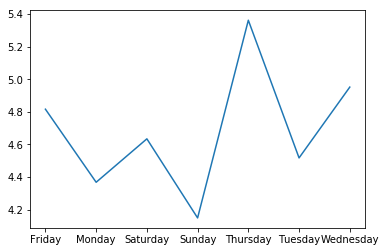

In [75]:
gw= big_difference.groupby('weekday')
print(gw.increment.mean())
plt.plot(gw.increment.mean())  # make days properly continuous by making 'weekday' an ordered categorical variable !?
# The observed differences could just be random: no evidence of high Weekend charging: Sunday is the lowest day.

In [76]:
g= four_years.groupby('hour')

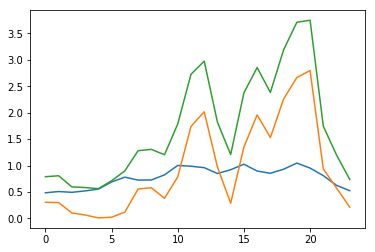

In [77]:
g.baseline.mean()
plt.plot(g.baseline.mean())
plt.plot(g.increment.mean())
plt.plot( g.baseline.mean() + g.increment.mean())

plt.show()
# DWW MUCH BETTER TO DO THIS AS A STACKED BAR CHART????

In [78]:
print(g.baseline.mean())
print(g.increment.mean())

hour
0     0.484571
1     0.508000
2     0.493524
3     0.519714
4     0.554000
5     0.689810
6     0.780476
7     0.725029
8     0.726476
9     0.823905
10    1.002267
11    0.987143
12    0.959619
13    0.849524
14    0.921105
15    1.025048
16    0.895619
17    0.853810
18    0.930667
19    1.046667
20    0.951714
21    0.808857
22    0.625333
23    0.523619
Name: baseline, dtype: float64
hour
0     0.304286
1     0.298571
2     0.102476
3     0.064000
4     0.008857
5     0.021905
6     0.118095
7     0.555543
8     0.579810
9     0.380667
10    0.786305
11    1.739429
12    2.016952
13    0.970190
14    0.287581
15    1.351810
16    1.958952
17    1.529905
18    2.260190
19    2.665619
20    2.798571
21    0.935143
22    0.574381
23    0.211810
Name: increment, dtype: float64


In [79]:
df_17= dft[dft.year== 2017]
df_17.info()
df_17.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 5 columns):
hour       8760 non-null category
kwh        8760 non-null float64
weekday    8760 non-null category
month      8760 non-null category
year       8760 non-null category
dtypes: category(4), float64(1)
memory usage: 173.1 KB


,hour,kwh,weekday,month,year
date,,,,,
2017-01-01 00:00:00,00,0.51,Sunday,1,2017
2017-01-01 01:00:00,01,0.51,Sunday,1,2017
2017-01-01 02:00:00,02,0.45,Sunday,1,2017
2017-01-01 03:00:00,03,0.51,Sunday,1,2017
2017-01-01 04:00:00,04,0.45,Sunday,1,2017


In [80]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m= ols(formula= 'kwh ~ hour + weekday + month + year', data= df_17).fit()  # .fit() already done (chained)

print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    kwh   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     48.43
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:07:09   Log-Likelihood:                -9604.8
No. Observations:                8760   AIC:                         1.929e+04
Df Residuals:                    8719   BIC:                         1.958e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8.945e+10 

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [81]:
df_16= dft[dft.year== 2016]

In [82]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m= ols(formula= 'kwh ~ hour + weekday + month + year', data= df_16).fit()  # .fit() already done (chained)

print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    kwh   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     56.73
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:07:09   Log-Likelihood:                -8742.7
No. Observations:                8756   AIC:                         1.757e+04
Df Residuals:                    8715   BIC:                         1.786e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.462e+11 

In [83]:
import pandas as pd

In [84]:
temps= pd.read_csv('chicago_hourly_temperatures.csv', usecols= [0,17])
temps.info()
temps.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 2 columns):
datetime    45253 non-null object
Chicago     45250 non-null float64
dtypes: float64(1), object(1)
memory usage: 707.2+ KB


,datetime,Chicago
0,10/1/12 12:00,NaN
1,10/1/12 13:00,284.010000
2,10/1/12 14:00,284.054691


In [85]:
temps['date']= pd.to_datetime(temps.datetime)
# raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')

In [86]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 3 columns):
datetime    45253 non-null object
Chicago     45250 non-null float64
date        45253 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.0+ MB


In [87]:
temps['hour']= temps.date.dt.hour
temps['year']= temps.date.dt.year
temps['F']= 1.8*(temps.Chicago - 273.15) + 32
temps.set_index(temps['date'], inplace= True)


In [88]:
temps.head()

,datetime,Chicago,date,hour,year,F
date,,,,,,
2012-10-01 12:00:00,10/1/12 12:00,NaN,2012-10-01 12:00:00,12,2012,NaN
2012-10-01 13:00:00,10/1/12 13:00,284.010000,2012-10-01 13:00:00,13,2012,51.548000
2012-10-01 14:00:00,10/1/12 14:00,284.054691,2012-10-01 14:00:00,14,2012,51.628444
2012-10-01 15:00:00,10/1/12 15:00,284.177412,2012-10-01 15:00:00,15,2012,51.849342
2012-10-01 16:00:00,10/1/12 16:00,284.300133,2012-10-01 16:00:00,16,2012,52.070240


In [89]:
temps= temps.drop(['datetime','date'], axis=1)
temps.head(3)

,Chicago,hour,year,F
date,,,,
2012-10-01 12:00:00,NaN,12,2012,NaN
2012-10-01 13:00:00,284.010000,13,2012,51.548000
2012-10-01 14:00:00,284.054691,14,2012,51.628444


In [90]:
temps_17= temps[temps.year== 2017]

In [91]:
temps_17.head(3)

,Chicago,hour,year,F
date,,,,
2017-01-01 00:00:00,274.06,0,2017,33.638
2017-01-01 01:00:00,272.94,1,2017,31.622
2017-01-01 02:00:00,272.14,2,2017,30.182


In [92]:
comb_17 = pd.merge(df_17, temps_17, left_index= True, right_index= True) # 'left_on= date, right_on= date)

In [93]:
comb_17.head(3)

,hour_x,kwh,weekday,month,year_x,Chicago,hour_y,year_y,F
date,,,,,,,,,
2017-01-01 00:00:00,00,0.51,Sunday,1,2017,274.06,0,2017,33.638
2017-01-01 01:00:00,01,0.51,Sunday,1,2017,272.94,1,2017,31.622
2017-01-01 02:00:00,02,0.45,Sunday,1,2017,272.14,2,2017,30.182


In [94]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m_comb= ols(formula= 'kwh ~ hour_y + weekday + month + year_y + F', data= comb_17).fit()  # .fit() already done (chained)

print(m_comb.summary())

                            OLS Regression Results                            
Dep. Variable:                    kwh   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     68.25
Date:                Sun, 31 Mar 2019   Prob (F-statistic):          1.25e-231
Time:                        19:07:22   Log-Likelihood:                -8960.5
No. Observations:                7993   AIC:                         1.796e+04
Df Residuals:                    7974   BIC:                         1.809e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              9.58e-08 

In [95]:
g= temps.groupby('hour')

In [96]:
F= 1.8*(g.mean()- 273.15) + 32
print(round(F, 1))

      Chicago    year      F
hour                        
0        53.0  3167.0 -364.2
1        51.8  3167.0 -366.5
2        50.4  3167.0 -369.0
3        49.5  3167.0 -370.5
4        48.7  3167.0 -372.0
5        48.0  3167.0 -373.3
6        47.5  3167.0 -374.1
7        47.0  3167.0 -375.1
8        46.5  3167.0 -375.9
9        46.1  3167.0 -376.7
10       45.8  3167.0 -377.3
11       45.6  3167.0 -377.6
12       46.2  3167.0 -376.4
13       47.0  3167.0 -375.0
14       48.7  3167.0 -372.0
15       50.5  3167.0 -368.7
16       52.1  3167.0 -365.9
17       53.5  3167.0 -363.4
18       54.5  3167.0 -361.5
19       55.3  3167.0 -360.1
20       55.7  3167.0 -359.4
21       55.6  3167.0 -359.6
22       55.2  3167.0 -360.2
23       54.2  3167.0 -362.2


In [97]:
pd.read_csv('chicago_hourly_temperatures.csv', usecols= [0,17])


,datetime,Chicago
0,10/1/12 12:00,NaN
1,10/1/12 13:00,284.010000
2,10/1/12 14:00,284.054691
3,10/1/12 15:00,284.177412
4,10/1/12 16:00,284.300133
5,10/1/12 17:00,284.422855
6,10/1/12 18:00,284.545576
7,10/1/12 19:00,284.668297
8,10/1/12 20:00,284.791018
9,10/1/12 21:00,284.913739


In [98]:
temps.head()

,Chicago,hour,year,F
date,,,,
2012-10-01 12:00:00,NaN,12,2012,NaN
2012-10-01 13:00:00,284.010000,13,2012,51.548000
2012-10-01 14:00:00,284.054691,14,2012,51.628444
2012-10-01 15:00:00,284.177412,15,2012,51.849342
2012-10-01 16:00:00,284.300133,16,2012,52.070240


In [99]:
comb= pd.merge()

TypeError: merge() missing 2 required positional arguments: 'left' and 'right'

In [ ]:
groupby hour and month mean 

In [ ]:
add temperature from Kaggle !!

 # OLD CODE BELOW TO BE EXCISED